# Linear Regression Experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

train_file = np.load('../../train.npz')
# train_file = np.load('/kaggle/input/cse-251-b-2025/train.npz')
train_data = train_file['data']
print("train_data's shape", train_data.shape)

test_file = np.load('../../test_input.npz')
# test_file = np.load('/kaggle/input/cse-251-b-2025/test_input.npz')
test_data = test_file['data']
print("test_data's shape", test_data.shape)

train_data's shape (10000, 50, 110, 6)
test_data's shape (2100, 50, 50, 6)


In [3]:
train_data = train_data[..., :6]
test_data = test_data[..., :6]
print("train_data's shape", train_data.shape)
print("test_data's shape", test_data.shape)

train_data's shape (10000, 50, 110, 6)
test_data's shape (2100, 50, 50, 6)


In [4]:
import sys
sys.path.append('../')
from TrajectoryDataset import TrajectoryDatasetTrain, TrajectoryDatasetTest
from utils import train_model

sys.path.append('../../')
from models.linear_regression import LinearRegressionModel

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch_geometric.data import Batch

In [6]:
torch.manual_seed(251)
np.random.seed(42)

scale = 5.0

N = len(train_data)
val_size = int(0.05 * N)
train_size = N - val_size

train_dataset = TrajectoryDatasetTrain(train_data[:train_size], scale=scale, augment=True)
val_dataset = TrajectoryDatasetTrain(train_data[train_size:], scale=scale, augment=False)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=lambda x: Batch.from_data_list(x))
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=lambda x: Batch.from_data_list(x))

# Set device for training speedup
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using Apple Silicon GPU")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA GPU")
else:
    device = torch.device('cpu')

Using Apple Silicon GPU


In [7]:
model = LinearRegressionModel()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.25) # You can try different schedulers
early_stopping_patience = 15
criterion = nn.MSELoss()

In [25]:
model = model.to(device)
train_model(
    model, 
    train_dataloader, 
    val_dataloader, 
    device, 
    optimizer, 
    criterion, 
    scheduler, 
    early_stopping_patience,
    "linear_regression_weights"
)

Epoch:   1%|          | 1/100 [00:04<06:42,  4.06s/epoch]

Epoch 000 | Learning rate 0.000100 | train normalized MSE 9821.2405 | val normalized MSE 4369.0214, | val unnormalized MAE 212.9531 | val unnormalized MSE 109225.5371


Epoch:   2%|▏         | 2/100 [00:07<06:03,  3.71s/epoch]

Epoch 001 | Learning rate 0.000100 | train normalized MSE 3830.6212 | val normalized MSE 2866.9605, | val unnormalized MAE 173.0659 | val unnormalized MSE 71674.0132


Epoch:   3%|▎         | 3/100 [00:11<05:59,  3.71s/epoch]

Epoch 002 | Learning rate 0.000100 | train normalized MSE 2884.0157 | val normalized MSE 2241.7189, | val unnormalized MAE 151.7988 | val unnormalized MSE 56042.9735


Epoch:   4%|▍         | 4/100 [00:15<06:02,  3.78s/epoch]

Epoch 003 | Learning rate 0.000100 | train normalized MSE 2335.1798 | val normalized MSE 1946.8790, | val unnormalized MAE 142.7650 | val unnormalized MSE 48671.9757


Epoch:   5%|▌         | 5/100 [00:18<06:01,  3.81s/epoch]

Epoch 004 | Learning rate 0.000100 | train normalized MSE 2031.3580 | val normalized MSE 1596.1946, | val unnormalized MAE 131.5973 | val unnormalized MSE 39904.8671


Epoch:   6%|▌         | 6/100 [00:22<05:40,  3.63s/epoch]

Epoch 005 | Learning rate 0.000100 | train normalized MSE 1885.3958 | val normalized MSE 1586.2619, | val unnormalized MAE 128.3575 | val unnormalized MSE 39656.5485


Epoch:   7%|▋         | 7/100 [00:25<05:25,  3.50s/epoch]

Epoch 006 | Learning rate 0.000100 | train normalized MSE 1759.0860 | val normalized MSE 1543.6969, | val unnormalized MAE 126.1446 | val unnormalized MSE 38592.4227


Epoch:   8%|▊         | 8/100 [00:29<05:48,  3.78s/epoch]

Epoch 007 | Learning rate 0.000100 | train normalized MSE 1615.8041 | val normalized MSE 1416.6740, | val unnormalized MAE 119.9941 | val unnormalized MSE 35416.8495


Epoch:   9%|▉         | 9/100 [00:34<05:55,  3.90s/epoch]

Epoch 008 | Learning rate 0.000100 | train normalized MSE 1505.9770 | val normalized MSE 1560.2247, | val unnormalized MAE 128.3962 | val unnormalized MSE 39005.6174


Epoch:  10%|█         | 10/100 [00:37<05:40,  3.79s/epoch]

Epoch 009 | Learning rate 0.000100 | train normalized MSE 1478.5448 | val normalized MSE 1228.7259, | val unnormalized MAE 113.8293 | val unnormalized MSE 30718.1465


Epoch:  11%|█         | 11/100 [00:41<05:36,  3.78s/epoch]

Epoch 010 | Learning rate 0.000100 | train normalized MSE 1383.0542 | val normalized MSE 1165.5139, | val unnormalized MAE 110.6634 | val unnormalized MSE 29137.8474


Epoch:  12%|█▏        | 12/100 [00:44<05:29,  3.74s/epoch]

Epoch 011 | Learning rate 0.000100 | train normalized MSE 1335.9858 | val normalized MSE 1241.7687, | val unnormalized MAE 112.4205 | val unnormalized MSE 31044.2185


Epoch:  13%|█▎        | 13/100 [00:48<05:17,  3.65s/epoch]

Epoch 012 | Learning rate 0.000100 | train normalized MSE 1240.3139 | val normalized MSE 1250.3917, | val unnormalized MAE 113.0331 | val unnormalized MSE 31259.7915


Epoch:  14%|█▍        | 14/100 [00:52<05:32,  3.87s/epoch]

Epoch 013 | Learning rate 0.000100 | train normalized MSE 1225.1186 | val normalized MSE 1166.8733, | val unnormalized MAE 110.7026 | val unnormalized MSE 29171.8322


Epoch:  15%|█▌        | 15/100 [00:56<05:20,  3.77s/epoch]

Epoch 014 | Learning rate 0.000100 | train normalized MSE 1118.7712 | val normalized MSE 1342.2579, | val unnormalized MAE 116.3032 | val unnormalized MSE 33556.4458


Epoch:  16%|█▌        | 16/100 [01:00<05:15,  3.75s/epoch]

Epoch 015 | Learning rate 0.000100 | train normalized MSE 1123.3127 | val normalized MSE 1377.4770, | val unnormalized MAE 115.0774 | val unnormalized MSE 34436.9250


Epoch:  17%|█▋        | 17/100 [01:03<05:08,  3.71s/epoch]

Epoch 016 | Learning rate 0.000100 | train normalized MSE 1136.3670 | val normalized MSE 1249.0335, | val unnormalized MAE 112.0286 | val unnormalized MSE 31225.8370


Epoch:  18%|█▊        | 18/100 [01:07<04:56,  3.61s/epoch]

Epoch 017 | Learning rate 0.000100 | train normalized MSE 1057.2156 | val normalized MSE 993.9967, | val unnormalized MAE 101.7177 | val unnormalized MSE 24849.9185


Epoch:  19%|█▉        | 19/100 [01:10<04:47,  3.54s/epoch]

Epoch 018 | Learning rate 0.000100 | train normalized MSE 1046.4539 | val normalized MSE 1027.5024, | val unnormalized MAE 103.4340 | val unnormalized MSE 25687.5612


Epoch:  20%|██        | 20/100 [01:13<04:39,  3.50s/epoch]

Epoch 019 | Learning rate 0.000025 | train normalized MSE 1018.1084 | val normalized MSE 878.1692, | val unnormalized MAE  96.1500 | val unnormalized MSE 21954.2289


Epoch:  21%|██        | 21/100 [01:17<04:30,  3.43s/epoch]

Epoch 020 | Learning rate 0.000025 | train normalized MSE 499.7212 | val normalized MSE 566.8475, | val unnormalized MAE  76.5729 | val unnormalized MSE 14171.1868


Epoch:  22%|██▏       | 22/100 [01:20<04:18,  3.32s/epoch]

Epoch 021 | Learning rate 0.000025 | train normalized MSE 453.1344 | val normalized MSE 539.9169, | val unnormalized MAE  75.2363 | val unnormalized MSE 13497.9214


Epoch:  23%|██▎       | 23/100 [01:23<04:10,  3.26s/epoch]

Epoch 022 | Learning rate 0.000025 | train normalized MSE 440.2423 | val normalized MSE 531.3832, | val unnormalized MAE  74.4215 | val unnormalized MSE 13284.5803


Epoch:  24%|██▍       | 24/100 [01:26<04:02,  3.19s/epoch]

Epoch 023 | Learning rate 0.000025 | train normalized MSE 427.7495 | val normalized MSE 575.5827, | val unnormalized MAE  76.9270 | val unnormalized MSE 14389.5687


Epoch:  25%|██▌       | 25/100 [01:29<03:56,  3.15s/epoch]

Epoch 024 | Learning rate 0.000025 | train normalized MSE 425.8097 | val normalized MSE 528.2519, | val unnormalized MAE  74.3617 | val unnormalized MSE 13206.2979


Epoch:  26%|██▌       | 26/100 [01:32<03:49,  3.11s/epoch]

Epoch 025 | Learning rate 0.000025 | train normalized MSE 410.9694 | val normalized MSE 495.4263, | val unnormalized MAE  72.0347 | val unnormalized MSE 12385.6582


Epoch:  27%|██▋       | 27/100 [01:35<03:45,  3.09s/epoch]

Epoch 026 | Learning rate 0.000025 | train normalized MSE 406.0259 | val normalized MSE 499.8419, | val unnormalized MAE  71.7443 | val unnormalized MSE 12496.0485


Epoch:  28%|██▊       | 28/100 [01:38<03:41,  3.07s/epoch]

Epoch 027 | Learning rate 0.000025 | train normalized MSE 397.4770 | val normalized MSE 489.3327, | val unnormalized MAE  71.6209 | val unnormalized MSE 12233.3174


Epoch:  29%|██▉       | 29/100 [01:41<03:37,  3.06s/epoch]

Epoch 028 | Learning rate 0.000025 | train normalized MSE 388.6367 | val normalized MSE 497.7454, | val unnormalized MAE  71.7914 | val unnormalized MSE 12443.6340


Epoch:  30%|███       | 30/100 [01:44<03:35,  3.08s/epoch]

Epoch 029 | Learning rate 0.000025 | train normalized MSE 382.0005 | val normalized MSE 442.5643, | val unnormalized MAE  67.5710 | val unnormalized MSE 11064.1089


Epoch:  31%|███       | 31/100 [01:47<03:38,  3.17s/epoch]

Epoch 030 | Learning rate 0.000025 | train normalized MSE 379.5716 | val normalized MSE 466.4495, | val unnormalized MAE  69.2856 | val unnormalized MSE 11661.2364


Epoch:  32%|███▏      | 32/100 [01:51<03:48,  3.36s/epoch]

Epoch 031 | Learning rate 0.000025 | train normalized MSE 374.8491 | val normalized MSE 451.7958, | val unnormalized MAE  68.3657 | val unnormalized MSE 11294.8944


Epoch:  33%|███▎      | 33/100 [01:55<03:47,  3.39s/epoch]

Epoch 032 | Learning rate 0.000025 | train normalized MSE 366.6584 | val normalized MSE 454.8856, | val unnormalized MAE  68.4053 | val unnormalized MSE 11372.1389


Epoch:  34%|███▍      | 34/100 [01:58<03:46,  3.43s/epoch]

Epoch 033 | Learning rate 0.000025 | train normalized MSE 358.2835 | val normalized MSE 455.6059, | val unnormalized MAE  68.7478 | val unnormalized MSE 11390.1466


Epoch:  35%|███▌      | 35/100 [02:02<03:49,  3.53s/epoch]

Epoch 034 | Learning rate 0.000025 | train normalized MSE 355.9097 | val normalized MSE 445.0753, | val unnormalized MAE  68.1708 | val unnormalized MSE 11126.8813


Epoch:  36%|███▌      | 36/100 [02:06<03:44,  3.51s/epoch]

Epoch 035 | Learning rate 0.000025 | train normalized MSE 348.2290 | val normalized MSE 423.3258, | val unnormalized MAE  66.2980 | val unnormalized MSE 10583.1458


Epoch:  37%|███▋      | 37/100 [02:09<03:38,  3.47s/epoch]

Epoch 036 | Learning rate 0.000025 | train normalized MSE 341.2466 | val normalized MSE 436.4054, | val unnormalized MAE  66.8865 | val unnormalized MSE 10910.1354


Epoch:  38%|███▊      | 38/100 [02:12<03:32,  3.42s/epoch]

Epoch 037 | Learning rate 0.000025 | train normalized MSE 338.5576 | val normalized MSE 428.3796, | val unnormalized MAE  66.5964 | val unnormalized MSE 10709.4899


Epoch:  39%|███▉      | 39/100 [02:16<03:28,  3.43s/epoch]

Epoch 038 | Learning rate 0.000025 | train normalized MSE 333.7714 | val normalized MSE 414.0980, | val unnormalized MAE  65.5616 | val unnormalized MSE 10352.4502


Epoch:  40%|████      | 40/100 [02:19<03:28,  3.48s/epoch]

Epoch 039 | Learning rate 0.000006 | train normalized MSE 328.0823 | val normalized MSE 421.6928, | val unnormalized MAE  66.3496 | val unnormalized MSE 10542.3202


Epoch:  41%|████      | 41/100 [02:23<03:23,  3.45s/epoch]

Epoch 040 | Learning rate 0.000006 | train normalized MSE 256.0336 | val normalized MSE 362.9149, | val unnormalized MAE  60.9592 | val unnormalized MSE 9072.8718


Epoch:  42%|████▏     | 42/100 [02:26<03:22,  3.49s/epoch]

Epoch 041 | Learning rate 0.000006 | train normalized MSE 249.0351 | val normalized MSE 358.4384, | val unnormalized MAE  60.5219 | val unnormalized MSE 8960.9596


Epoch:  43%|████▎     | 43/100 [02:31<03:38,  3.83s/epoch]

Epoch 042 | Learning rate 0.000006 | train normalized MSE 247.5580 | val normalized MSE 355.7802, | val unnormalized MAE  60.3892 | val unnormalized MSE 8894.5044


Epoch:  44%|████▍     | 44/100 [02:35<03:38,  3.91s/epoch]

Epoch 043 | Learning rate 0.000006 | train normalized MSE 243.3532 | val normalized MSE 354.6460, | val unnormalized MAE  60.2984 | val unnormalized MSE 8866.1509


Epoch:  45%|████▌     | 45/100 [02:39<03:32,  3.86s/epoch]

Epoch 044 | Learning rate 0.000006 | train normalized MSE 242.8590 | val normalized MSE 358.3909, | val unnormalized MAE  60.5267 | val unnormalized MSE 8959.7717


Epoch:  46%|████▌     | 46/100 [02:43<03:30,  3.90s/epoch]

Epoch 045 | Learning rate 0.000006 | train normalized MSE 242.0972 | val normalized MSE 353.2185, | val unnormalized MAE  60.0766 | val unnormalized MSE 8830.4633


Epoch:  47%|████▋     | 47/100 [02:46<03:22,  3.81s/epoch]

Epoch 046 | Learning rate 0.000006 | train normalized MSE 241.2936 | val normalized MSE 348.5309, | val unnormalized MAE  59.7345 | val unnormalized MSE 8713.2721


Epoch:  48%|████▊     | 48/100 [02:50<03:24,  3.92s/epoch]

Epoch 047 | Learning rate 0.000006 | train normalized MSE 238.5505 | val normalized MSE 350.7874, | val unnormalized MAE  59.8601 | val unnormalized MSE 8769.6855


Epoch:  49%|████▉     | 49/100 [02:55<03:29,  4.11s/epoch]

Epoch 048 | Learning rate 0.000006 | train normalized MSE 235.6220 | val normalized MSE 345.5632, | val unnormalized MAE  59.4900 | val unnormalized MSE 8639.0793


Epoch:  50%|█████     | 50/100 [02:59<03:18,  3.98s/epoch]

Epoch 049 | Learning rate 0.000006 | train normalized MSE 236.3291 | val normalized MSE 347.8818, | val unnormalized MAE  59.7864 | val unnormalized MSE 8697.0463


Epoch:  51%|█████     | 51/100 [03:02<03:07,  3.82s/epoch]

Epoch 050 | Learning rate 0.000006 | train normalized MSE 234.4394 | val normalized MSE 343.5620, | val unnormalized MAE  59.3893 | val unnormalized MSE 8589.0512


Epoch:  52%|█████▏    | 52/100 [03:05<02:55,  3.66s/epoch]

Epoch 051 | Learning rate 0.000006 | train normalized MSE 231.7511 | val normalized MSE 341.9235, | val unnormalized MAE  59.1351 | val unnormalized MSE 8548.0873


Epoch:  53%|█████▎    | 53/100 [03:09<02:45,  3.52s/epoch]

Epoch 052 | Learning rate 0.000006 | train normalized MSE 231.5285 | val normalized MSE 344.1217, | val unnormalized MAE  59.4063 | val unnormalized MSE 8603.0423


Epoch:  54%|█████▍    | 54/100 [03:12<02:39,  3.46s/epoch]

Epoch 053 | Learning rate 0.000006 | train normalized MSE 229.4435 | val normalized MSE 339.7935, | val unnormalized MAE  59.0119 | val unnormalized MSE 8494.8382


Epoch:  55%|█████▌    | 55/100 [03:16<02:43,  3.63s/epoch]

Epoch 054 | Learning rate 0.000006 | train normalized MSE 228.8112 | val normalized MSE 336.3870, | val unnormalized MAE  58.6767 | val unnormalized MSE 8409.6750


Epoch:  56%|█████▌    | 56/100 [03:20<02:44,  3.75s/epoch]

Epoch 055 | Learning rate 0.000006 | train normalized MSE 227.3243 | val normalized MSE 340.5683, | val unnormalized MAE  59.0626 | val unnormalized MSE 8514.2083


Epoch:  57%|█████▋    | 57/100 [03:25<02:51,  3.98s/epoch]

Epoch 056 | Learning rate 0.000006 | train normalized MSE 226.3946 | val normalized MSE 334.2692, | val unnormalized MAE  58.5757 | val unnormalized MSE 8356.7295


Epoch:  58%|█████▊    | 58/100 [03:29<02:48,  4.01s/epoch]

Epoch 057 | Learning rate 0.000006 | train normalized MSE 225.2293 | val normalized MSE 332.1721, | val unnormalized MAE  58.2967 | val unnormalized MSE 8304.3026


Epoch:  59%|█████▉    | 59/100 [03:32<02:37,  3.84s/epoch]

Epoch 058 | Learning rate 0.000006 | train normalized MSE 222.4509 | val normalized MSE 336.6409, | val unnormalized MAE  58.6259 | val unnormalized MSE 8416.0241


Epoch:  60%|██████    | 60/100 [03:35<02:29,  3.73s/epoch]

Epoch 059 | Learning rate 0.000002 | train normalized MSE 223.5207 | val normalized MSE 327.1538, | val unnormalized MAE  58.0284 | val unnormalized MSE 8178.8446


Epoch:  61%|██████    | 61/100 [03:39<02:20,  3.61s/epoch]

Epoch 060 | Learning rate 0.000002 | train normalized MSE 205.2811 | val normalized MSE 321.0620, | val unnormalized MAE  57.1736 | val unnormalized MSE 8026.5493


Epoch:  62%|██████▏   | 62/100 [03:42<02:17,  3.61s/epoch]

Epoch 061 | Learning rate 0.000002 | train normalized MSE 203.1654 | val normalized MSE 318.9942, | val unnormalized MAE  57.0067 | val unnormalized MSE 7974.8547


Epoch:  63%|██████▎   | 63/100 [03:46<02:12,  3.58s/epoch]

Epoch 062 | Learning rate 0.000002 | train normalized MSE 202.9434 | val normalized MSE 317.8082, | val unnormalized MAE  56.8964 | val unnormalized MSE 7945.2059


Epoch:  64%|██████▍   | 64/100 [03:49<02:07,  3.55s/epoch]

Epoch 063 | Learning rate 0.000002 | train normalized MSE 203.5008 | val normalized MSE 317.6874, | val unnormalized MAE  56.8974 | val unnormalized MSE 7942.1858


Epoch:  65%|██████▌   | 65/100 [03:53<02:03,  3.51s/epoch]

Epoch 064 | Learning rate 0.000002 | train normalized MSE 202.2167 | val normalized MSE 316.5846, | val unnormalized MAE  56.7849 | val unnormalized MSE 7914.6144


Epoch:  66%|██████▌   | 66/100 [03:56<01:59,  3.50s/epoch]

Epoch 065 | Learning rate 0.000002 | train normalized MSE 202.2849 | val normalized MSE 316.6430, | val unnormalized MAE  56.8345 | val unnormalized MSE 7916.0755


Epoch:  67%|██████▋   | 67/100 [04:00<01:54,  3.48s/epoch]

Epoch 066 | Learning rate 0.000002 | train normalized MSE 201.4209 | val normalized MSE 315.4038, | val unnormalized MAE  56.7286 | val unnormalized MSE 7885.0954


Epoch:  68%|██████▊   | 68/100 [04:03<01:50,  3.44s/epoch]

Epoch 067 | Learning rate 0.000002 | train normalized MSE 202.1555 | val normalized MSE 315.6392, | val unnormalized MAE  56.6659 | val unnormalized MSE 7890.9801


Epoch:  69%|██████▉   | 69/100 [04:07<01:46,  3.43s/epoch]

Epoch 068 | Learning rate 0.000002 | train normalized MSE 200.7124 | val normalized MSE 316.4653, | val unnormalized MAE  56.7429 | val unnormalized MSE 7911.6332


Epoch:  70%|███████   | 70/100 [04:11<01:48,  3.63s/epoch]

Epoch 069 | Learning rate 0.000002 | train normalized MSE 201.1666 | val normalized MSE 315.0250, | val unnormalized MAE  56.6457 | val unnormalized MSE 7875.6252


Epoch:  71%|███████   | 71/100 [04:15<01:56,  4.00s/epoch]

Epoch 070 | Learning rate 0.000002 | train normalized MSE 199.8343 | val normalized MSE 314.1713, | val unnormalized MAE  56.5558 | val unnormalized MSE 7854.2825


Epoch:  72%|███████▏  | 72/100 [04:19<01:49,  3.90s/epoch]

Epoch 071 | Learning rate 0.000002 | train normalized MSE 200.6173 | val normalized MSE 316.1485, | val unnormalized MAE  56.6925 | val unnormalized MSE 7903.7128


Epoch:  73%|███████▎  | 73/100 [04:23<01:42,  3.79s/epoch]

Epoch 072 | Learning rate 0.000002 | train normalized MSE 199.4274 | val normalized MSE 313.0936, | val unnormalized MAE  56.5285 | val unnormalized MSE 7827.3392


Epoch:  74%|███████▍  | 74/100 [04:26<01:38,  3.79s/epoch]

Epoch 073 | Learning rate 0.000002 | train normalized MSE 199.3268 | val normalized MSE 313.2864, | val unnormalized MAE  56.4719 | val unnormalized MSE 7832.1599


Epoch:  75%|███████▌  | 75/100 [04:30<01:31,  3.68s/epoch]

Epoch 074 | Learning rate 0.000002 | train normalized MSE 198.7018 | val normalized MSE 314.4346, | val unnormalized MAE  56.5839 | val unnormalized MSE 7860.8641


Epoch:  76%|███████▌  | 76/100 [04:33<01:25,  3.58s/epoch]

Epoch 075 | Learning rate 0.000002 | train normalized MSE 198.4934 | val normalized MSE 313.1299, | val unnormalized MAE  56.4755 | val unnormalized MSE 7828.2487


Epoch:  77%|███████▋  | 77/100 [04:37<01:21,  3.55s/epoch]

Epoch 076 | Learning rate 0.000002 | train normalized MSE 199.0366 | val normalized MSE 313.6173, | val unnormalized MAE  56.5015 | val unnormalized MSE 7840.4317


Epoch:  78%|███████▊  | 78/100 [04:40<01:16,  3.50s/epoch]

Epoch 077 | Learning rate 0.000002 | train normalized MSE 197.9360 | val normalized MSE 312.3897, | val unnormalized MAE  56.4210 | val unnormalized MSE 7809.7434


Epoch:  79%|███████▉  | 79/100 [04:43<01:11,  3.43s/epoch]

Epoch 078 | Learning rate 0.000002 | train normalized MSE 196.8605 | val normalized MSE 312.4050, | val unnormalized MAE  56.4898 | val unnormalized MSE 7810.1255


Epoch:  80%|████████  | 80/100 [04:47<01:10,  3.50s/epoch]

Epoch 079 | Learning rate 0.000000 | train normalized MSE 196.9705 | val normalized MSE 311.2837, | val unnormalized MAE  56.3397 | val unnormalized MSE 7782.0925


Epoch:  81%|████████  | 81/100 [04:50<01:05,  3.46s/epoch]

Epoch 080 | Learning rate 0.000000 | train normalized MSE 192.1570 | val normalized MSE 309.2060, | val unnormalized MAE  56.0622 | val unnormalized MSE 7730.1509


Epoch:  82%|████████▏ | 82/100 [04:54<01:03,  3.54s/epoch]

Epoch 081 | Learning rate 0.000000 | train normalized MSE 192.1001 | val normalized MSE 308.6950, | val unnormalized MAE  56.0364 | val unnormalized MSE 7717.3761


Epoch:  83%|████████▎ | 83/100 [04:58<01:00,  3.58s/epoch]

Epoch 082 | Learning rate 0.000000 | train normalized MSE 192.0531 | val normalized MSE 308.4672, | val unnormalized MAE  56.0117 | val unnormalized MSE 7711.6801


Epoch:  84%|████████▍ | 84/100 [05:01<00:55,  3.48s/epoch]

Epoch 083 | Learning rate 0.000000 | train normalized MSE 192.4526 | val normalized MSE 309.2432, | val unnormalized MAE  56.0385 | val unnormalized MSE 7731.0805


Epoch:  85%|████████▌ | 85/100 [05:04<00:51,  3.42s/epoch]

Epoch 084 | Learning rate 0.000000 | train normalized MSE 192.3108 | val normalized MSE 308.6982, | val unnormalized MAE  56.0226 | val unnormalized MSE 7717.4541


Epoch:  86%|████████▌ | 86/100 [05:08<00:47,  3.38s/epoch]

Epoch 085 | Learning rate 0.000000 | train normalized MSE 191.6190 | val normalized MSE 308.2006, | val unnormalized MAE  56.0077 | val unnormalized MSE 7705.0155


Epoch:  87%|████████▋ | 87/100 [05:11<00:43,  3.36s/epoch]

Epoch 086 | Learning rate 0.000000 | train normalized MSE 191.9161 | val normalized MSE 307.8762, | val unnormalized MAE  55.9543 | val unnormalized MSE 7696.9044


Epoch:  88%|████████▊ | 88/100 [05:14<00:40,  3.36s/epoch]

Epoch 087 | Learning rate 0.000000 | train normalized MSE 191.4850 | val normalized MSE 308.0260, | val unnormalized MAE  55.9616 | val unnormalized MSE 7700.6501


Epoch:  89%|████████▉ | 89/100 [05:18<00:36,  3.35s/epoch]

Epoch 088 | Learning rate 0.000000 | train normalized MSE 190.8677 | val normalized MSE 308.3156, | val unnormalized MAE  55.9755 | val unnormalized MSE 7707.8910


Epoch:  90%|█████████ | 90/100 [05:21<00:33,  3.33s/epoch]

Epoch 089 | Learning rate 0.000000 | train normalized MSE 192.7364 | val normalized MSE 308.1695, | val unnormalized MAE  55.9635 | val unnormalized MSE 7704.2372


Epoch:  91%|█████████ | 91/100 [05:24<00:29,  3.30s/epoch]

Epoch 090 | Learning rate 0.000000 | train normalized MSE 190.9067 | val normalized MSE 307.5109, | val unnormalized MAE  55.9242 | val unnormalized MSE 7687.7717


Epoch:  92%|█████████▏| 92/100 [05:27<00:26,  3.30s/epoch]

Epoch 091 | Learning rate 0.000000 | train normalized MSE 191.1032 | val normalized MSE 307.7131, | val unnormalized MAE  55.9411 | val unnormalized MSE 7692.8282


Epoch:  93%|█████████▎| 93/100 [05:31<00:23,  3.33s/epoch]

Epoch 092 | Learning rate 0.000000 | train normalized MSE 191.6548 | val normalized MSE 307.4625, | val unnormalized MAE  55.9171 | val unnormalized MSE 7686.5612


Epoch:  94%|█████████▍| 94/100 [05:34<00:20,  3.35s/epoch]

Epoch 093 | Learning rate 0.000000 | train normalized MSE 191.2445 | val normalized MSE 307.6425, | val unnormalized MAE  55.9383 | val unnormalized MSE 7691.0631


Epoch:  95%|█████████▌| 95/100 [05:38<00:16,  3.38s/epoch]

Epoch 094 | Learning rate 0.000000 | train normalized MSE 191.6620 | val normalized MSE 307.1768, | val unnormalized MAE  55.9107 | val unnormalized MSE 7679.4214


Epoch:  96%|█████████▌| 96/100 [05:41<00:13,  3.40s/epoch]

Epoch 095 | Learning rate 0.000000 | train normalized MSE 190.9572 | val normalized MSE 307.3255, | val unnormalized MAE  55.8945 | val unnormalized MSE 7683.1365


Epoch:  97%|█████████▋| 97/100 [05:45<00:10,  3.40s/epoch]

Epoch 096 | Learning rate 0.000000 | train normalized MSE 190.6948 | val normalized MSE 306.7387, | val unnormalized MAE  55.8649 | val unnormalized MSE 7668.4680


Epoch:  98%|█████████▊| 98/100 [05:48<00:06,  3.43s/epoch]

Epoch 097 | Learning rate 0.000000 | train normalized MSE 190.6593 | val normalized MSE 306.5788, | val unnormalized MAE  55.8530 | val unnormalized MSE 7664.4697


Epoch:  99%|█████████▉| 99/100 [05:52<00:03,  3.45s/epoch]

Epoch 098 | Learning rate 0.000000 | train normalized MSE 190.1146 | val normalized MSE 306.6116, | val unnormalized MAE  55.8374 | val unnormalized MSE 7665.2890


Epoch: 100%|██████████| 100/100 [05:55<00:00,  3.55s/epoch]

Epoch 099 | Learning rate 0.000000 | train normalized MSE 190.4754 | val normalized MSE 307.0003, | val unnormalized MAE  55.8687 | val unnormalized MSE 7675.0079


In [8]:
test_dataset = TrajectoryDatasetTest(test_data, scale=scale)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,
                         collate_fn=lambda xs: Batch.from_data_list(xs))

mlp_weights = torch.load("linear_regression_weights.pt")
model = LinearRegressionModel()
model.load_state_dict(mlp_weights)

# also save entire model
torch.save(model, "full_linear_regression_model.pt")

In [ ]:
# this runs on the test data to submit for the competition
test_dataset.generate_submission_predictions(model, device, output_file_name='linear_regression_submission')

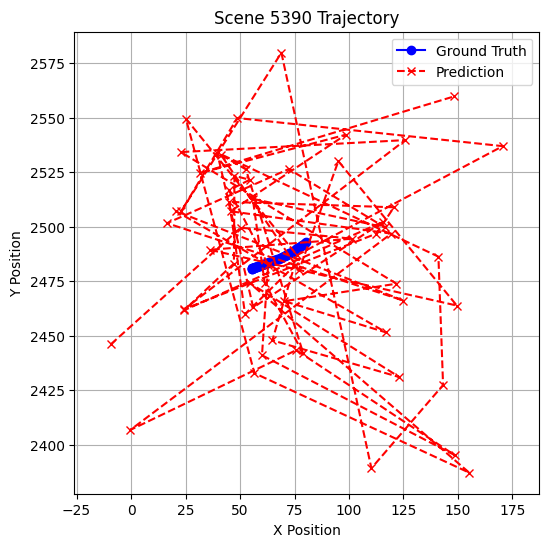

In [11]:
from utils import visualize_trajectory

# run this cell to visualize how the model's predicted trajectory compares to the real one on some data points
visualize_trajectory(train_dataset, model, np.random.randint(0, len(train_dataset)))